    Transaction ID       Date Customer ID Product ID Product Category Region  \
0                1 2024-07-05       C1001       P001      Electronics  North   
1                2 2024-07-05       C1002       P002         Clothing  South   
2                3 2024-07-06       C1001       P003      Electronics  North   
3                4 2024-07-07       C1003       P001      Electronics  South   
4                5 2024-07-08       C1002       P004         Clothing  North   
5                6 2024-07-09       C1001       P002         Clothing  South   
6                7 2024-07-10       C1004       P005       Home Goods  North   
7                8 2024-07-11       C1003       P006          Grocery  South   
8                9 2024-07-12       C1002       P001      Electronics  North   
9               10 2024-07-13       C1001       P007            Books  South   
10              11 2024-07-06       C1017       P001      Electronics  North   
11              12 2024-07-08       C101

C:\Users\saith\AppData\Local\Temp\ipykernel_22172\3524928755.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales Amount'].fillna(df['Sales Amount'].mean(),inplace=True)
C:\Users\saith\AppData\Local\Temp\ipykernel_22172\3524928755.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

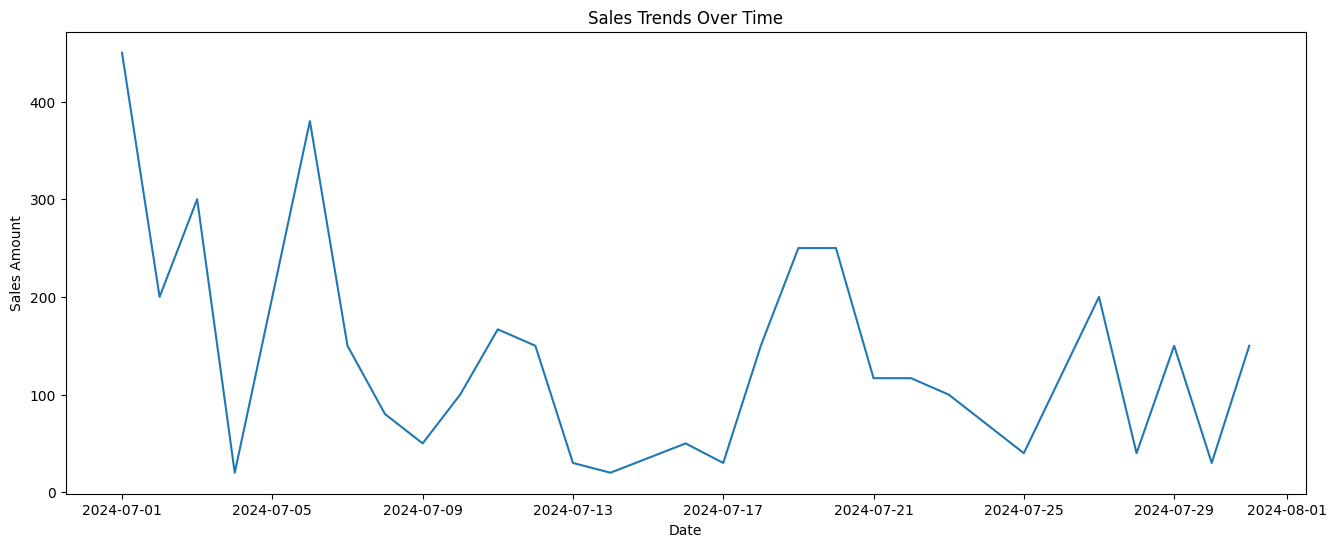

There is a seasonality in sales.





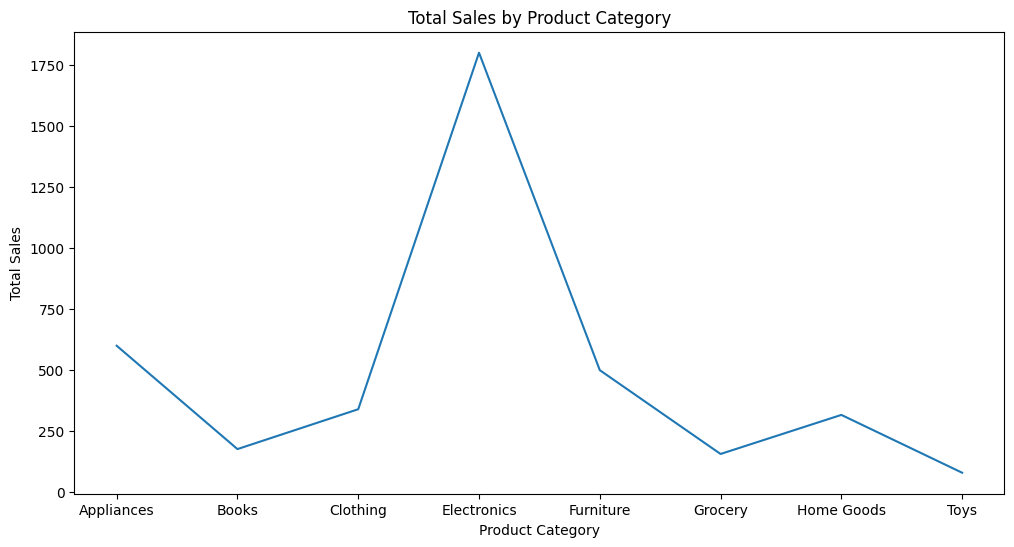

Best-selling category: Electronics
Worst-selling category: Toys
Product Category
Appliances     240.000000
Books          131.774194
Clothing       163.000000
Electronics    800.000000
Furniture      200.000000
Grocery        126.774194
Home Goods     136.774194
Toys            40.000000
dtype: float64


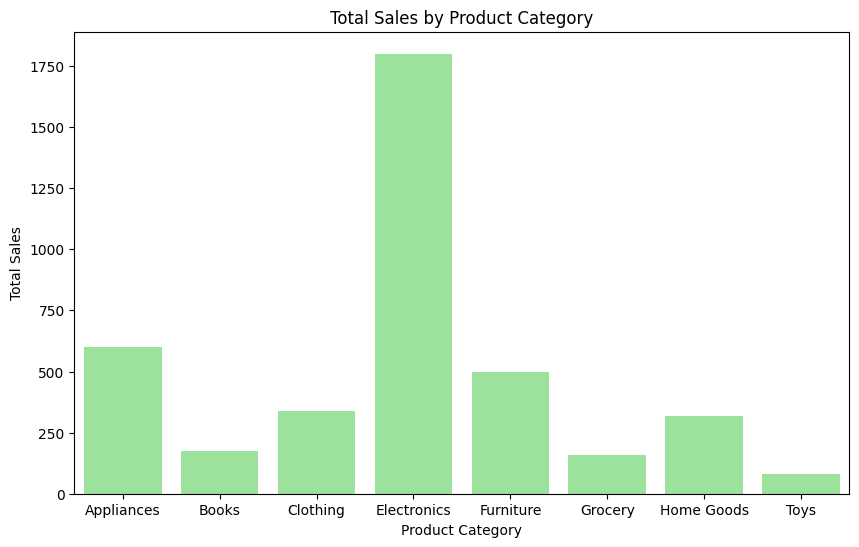

Product Category  Appliances       Books  Clothing  Electronics  Furniture  \
Region                                                                       
North                  600.0         NaN     140.0       1000.0        NaN   
South                    NaN  176.774194     200.0        800.0      500.0   
All                    600.0  176.774194     340.0       1800.0      500.0   

Product Category     Grocery  Home Goods  Toys          All  
Region                                                       
North              20.000000  200.000000  80.0  2040.000000  
South             136.774194  116.774194   NaN  1930.322581  
All               156.774194  316.774194  80.0  3970.322581  


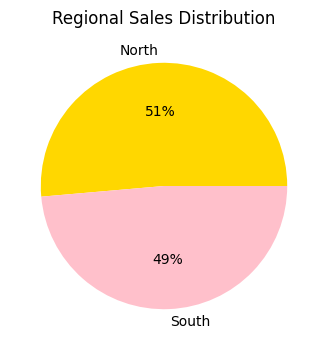

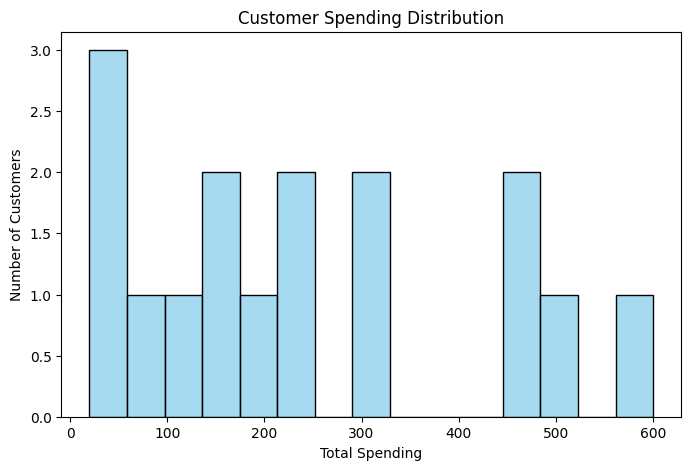

In [1]:
# Load the dataset using Pandas.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('D:/CRT/excel practice/superstore dataset.xlsx')
print(df)
# Check for missing or inconsistent values
df.isnull()
# Handle missing values and outliers (e.g., using imputation or filtering).
df['Sales Amount'].fillna(df['Sales Amount'].mean(),inplace=True)
print(df)
# Check for missing or inconsistent values
df.isnull()
# Handle missing values and outliers (e.g., using imputation or filtering).
df['Sales Amount'].fillna(df['Sales Amount'].mean(),inplace=True)
print(df)
# Analyze sales trends over time (daily, monthly, yearly).
# Identify peak sales periods and any seasonality in sales.
plt.figure(figsize=(16,6))
sales_trends_over_time =df.groupby('Date')['Sales Amount'].sum()
plt.plot(sales_trends_over_time.index,sales_trends_over_time.values)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales Trends Over Time')
plt.show()
print("There is a seasonality in sales.\n\n\n")
# for the peak sales periods
top_cate = df.groupby('Product Category')['Sales Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(top_cate.index,top_cate.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()
#B. Product Analysis
#Identify the best-selling and least-selling product categories.
product_sales = df.groupby('Product Category')['Sales Amount'].sum()
product_cost = df.groupby('Product Category')['Cost'].sum()
print("Best-selling category:",product_sales.idxmax())
print("Worst-selling category:",product_sales.idxmin())
# Calculate profitability for each product category.
product_profit = product_sales - product_cost
print(product_profit)
# Create bar chart of total sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index, y=product_sales.values,color='lightgreen')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()
#C. Regional Performance
# Analyze regional contributions to total sales.
#pivot table
#also identifying the underperformance regions
pivot=pd.pivot_table(df, values='Sales Amount',index='Region',columns='Product Category',aggfunc='sum',margins=True)
print(pivot)
# Create a pie chart or bar chart for regional sales distribution
regional_sales=df.groupby('Region')['Sales Amount'].sum()
plt.figure(figsize=(4, 4))
plt.pie(regional_sales, labels=regional_sales.index, autopct='%1.0f%%',colors=['gold','pink'])
plt.title('Regional Sales Distribution')
plt.show()
#D. Customer Segmentation
# Segment customers based on their total spending
# Identify high-value customers and their purchasing behavior.
# Use a scatter plot or histogram for visual representation.
customer_spending = df.groupby('Customer ID')['Sales Amount'].sum()
plt.figure(figsize=(8,5))
sns.histplot(customer_spending, bins=15,color='skyblue')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()
